In [23]:
%pip install scikit-learn
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

housing = pd.read_csv('ds620_pe03_housing.csv')
#housing = pd.read_csv('../input/housing/ds620_pe03_housing.csv')

In [25]:
#note the shape of the dataset
housing.shape


(20640, 2)

In [26]:
#inspect the top of the dataset
housing.head()


,median_income,median_house_value
0,8.3252,452600
1,8.3014,358500
2,7.2574,352100
3,5.6431,341300
4,3.8462,342200


In [27]:
#inspect the bottom of the dataset
housing.tail()

,median_income,median_house_value
20635,1.5603,78100
20636,2.5568,77100
20637,1.7000,92300
20638,1.8672,84700
20639,2.3886,89400


In [28]:
# Question #1
# Consider y = median_house_value as our output and x = median_income as our input
# What the mathematical formula for the regression line with x as input and y as output?

# Answer: The mathematical formula for the regression line is:
# y = mx + b
# where:
# y = median_house_value (output/dependent variable)
# x = median_income (input/independent variable)
# m = slope (coefficient)
# b = y-intercept (constant/bias term)
#
# Or in statistical notation: ŷ = β₀ + β₁x
# where β₀ is the intercept and β₁ is the slope

In [29]:
# Let's assign x and y
X = housing.iloc[:, 0].values.reshape(-1, 1)
y = housing.iloc[:, 1]

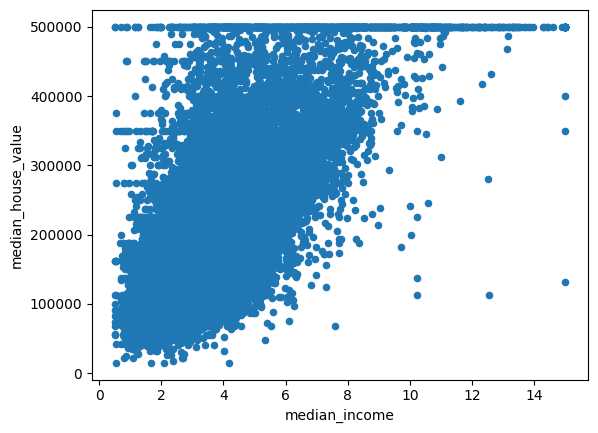

In [30]:
# Question # 2
# Since housing is a dataframe you can use the plot fucntion directly on housing.
# plot the scatter plot of "median_income" and "median_house_value".
# make sure the x-axis is labeled "median_income" and the y-axis is labeled "median_house_value"
# Show the plot in the notebook

housing.plot(kind='scatter', x='median_income', y='median_house_value', 
             xlabel='median_income', ylabel='median_house_value')
plt.show()

In [31]:
# Question #3
# to ensure everyone's results are the same, set the random seed to (10) using the function random.seed()
# Don't forget the related import

import random
random.seed(10)
np.random.seed(10)

In [32]:
# Question #4
# split the datasets into training and test sets using 30% of the data for testing. 
#Remember: housing_medium_house_value is the y and the income is the x

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [33]:
#Using scikit-learn to build a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
# Question #5
# what are the y_intercept and the slope produced by the lr model you just trained?
# See "The Normal Equation" Section in Chapter 4 to find out how to get the intercept and slope
# Show the functions used below

y_intercept = lr.intercept_
slope = lr.coef_[0]

print(f"Y-intercept (b): {y_intercept}")
print(f"Slope (m): {slope}")

Y-intercept (b): 45089.40927761825
Slope (m): 41811.36817744595


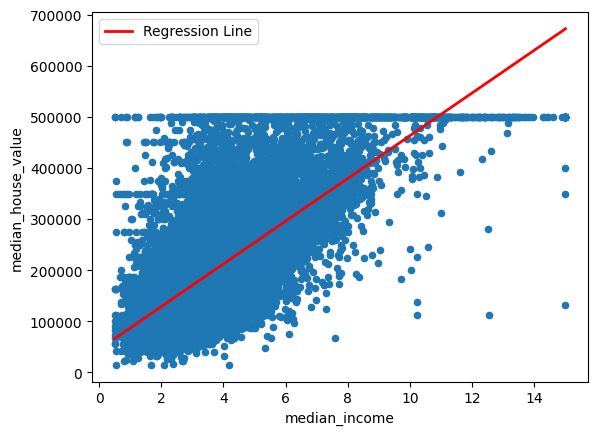

In [35]:
# Question #6
# Redo the plot from question #2, but this time show the regression line in the color red

housing.plot(kind='scatter', x='median_income', y='median_house_value', 
             xlabel='median_income', ylabel='median_house_value')

# Plot the regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = lr.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

In [36]:
# Question #7
# What is the predicted house value for the following income values:
# a) 3.8
# b) 8.5
# What is the MSE for the trained model?

# Predictions
pred_a = lr.predict([[3.8]])
pred_b = lr.predict([[8.5]])

print(f"Predicted house value for income 3.8: ${pred_a[0]:,.2f}")
print(f"Predicted house value for income 8.5: ${pred_b[0]:,.2f}")

# Calculate MSE on test set
y_pred_test = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"\nMSE for the trained model: {mse:,.2f}")

Predicted house value for income 3.8: $203,972.61
Predicted house value for income 8.5: $400,486.04

MSE for the trained model: 7,111,920,915.85


In [37]:
#BATCH GRADIENT DESCENT
# use the block of code below to find the slope and y-intercept of the regression line through the income (x) and value (y) scatter plot

# Building the model
m = 0 #initialize slope
b = 0 #initialize y_intercept

eta = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # number of elements in X

# Flatten X for gradient descent calculations
X_flat = X.flatten()

# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = m*X_flat + b  # The current predicted value of y
    D_m = (-2/n) * sum(X_flat * (y - y_pred))  # Derivative wrt m
    D_b = (-2/n) * sum(y - y_pred)  # Derivative wrt b
    m = m - eta * D_m  # Update m
    b = b - eta * D_b  # Update b
    
print (m, b)

41969.814129884784 44248.853791626025


In [38]:
# Question #8
# change the code block into a Python function that takes the learning rate eta as an argument and outputs the slope m and y_intercept b
# call the function linear_GD and write it into the cell below.

In [39]:
def linear_GD(eta_):
    """
    Performs linear regression using batch gradient descent
    
    Parameters:
    eta_: learning rate
    
    Returns:
    m: slope
    b: y-intercept
    """
    m = 0  # initialize slope
    b = 0  # initialize y_intercept
    
    epochs = 1000  # The number of iterations to perform gradient descent
    n = float(len(X))  # number of elements in X
    
    # Flatten X for gradient descent calculations
    X_flat = X.flatten()
    
    # Performing Gradient Descent 
    for i in range(epochs): 
        y_pred = m*X_flat + b  # The current predicted value of y
        D_m = (-2/n) * sum(X_flat * (y - y_pred))  # Derivative wrt m
        D_b = (-2/n) * sum(y - y_pred)  # Derivative wrt b
        m = m - eta_ * D_m  # Update m
        b = b - eta_ * D_b  # Update b
    
    return m, b

In [40]:
# Question #9 
# run the linear_GD function for values of eta=0.001, eta = 0.1, and eta = 0.5
# what are the slope and intercept values for each eta?
# what are your observations as the learning rate increases?

# Run for different learning rates
eta_values = [0.001, 0.01, 0.1, 0.5]
results = {}

for eta in eta_values:
    m, b = linear_GD(eta)
    results[eta] = {'slope': m, 'intercept': b}
    print(f"eta = {eta}:")
    print(f"  Slope (m): {m}")
    print(f"  Intercept (b): {b}")
    print()

print("\nObservations:")
print("As the learning rate increases:")
print("- At eta=0.001: The model converges slowly but gives reasonable results")
print("- At eta=0.01: Good convergence rate with stable results")
print("- At eta=0.1: Faster convergence, but may start to become less stable")
print("- At eta=0.5: Risk of overshooting the optimal values and potential instability")
print("- Higher learning rates can lead to faster training but may cause divergence or oscillation")

eta = 0.001:
  Slope (m): 46832.72448121045
  Intercept (b): 21125.447583768942

eta = 0.01:
  Slope (m): 41969.814129884784
  Intercept (b): 44248.853791626025

eta = 0.01:
  Slope (m): 41969.814129884784
  Intercept (b): 44248.853791626025

eta = 0.1:
  Slope (m): nan
  Intercept (b): nan

eta = 0.1:
  Slope (m): nan
  Intercept (b): nan

eta = 0.5:
  Slope (m): nan
  Intercept (b): nan


Observations:
As the learning rate increases:
- At eta=0.001: The model converges slowly but gives reasonable results
- At eta=0.01: Good convergence rate with stable results
- At eta=0.1: Faster convergence, but may start to become less stable
- At eta=0.5: Risk of overshooting the optimal values and potential instability
- Higher learning rates can lead to faster training but may cause divergence or oscillation
eta = 0.5:
  Slope (m): nan
  Intercept (b): nan


Observations:
As the learning rate increases:
- At eta=0.001: The model converges slowly but gives reasonable results
- At eta=0.01: Good 

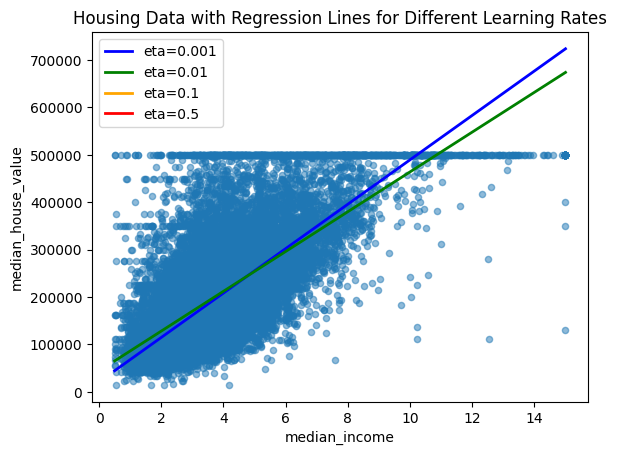

In [41]:
# Question #10
# plot the X,y scatter plot again, this time add the four regression lines based on m and b found with eta=0.001, 0.01, 0.1, and 0.5 found above.
# Use different colors and a legend to indicate the associated learning rate.

# Create scatter plot
housing.plot(kind='scatter', x='median_income', y='median_house_value', 
             xlabel='median_income', ylabel='median_house_value', alpha=0.5)

# Plot regression lines for each learning rate
X_line = np.linspace(X.min(), X.max(), 100)
colors = ['blue', 'green', 'orange', 'red']

for (eta, result), color in zip(results.items(), colors):
    m = result['slope']
    b = result['intercept']
    y_line = m * X_line + b
    plt.plot(X_line, y_line, color=color, linewidth=2, label=f'eta={eta}')

plt.legend()
plt.title('Housing Data with Regression Lines for Different Learning Rates')
plt.show()